<a href="https://colab.research.google.com/github/code-adi56/New-folder/blob/master/Crop_prediction_model_based_on_Lgm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Crop recommendation using various parameters of n,p,k
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
# Define the colors for various materials
colorarr= ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008', '#9acd32', '#Eedc82', '#E4d96f',
           '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064', '#E75480', '#Ffb6c1', '#E5e4e2',
           '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

# import dataset
cropdf = pd.read_csv("Crop_recommendation.csv")
cropdf.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
print(cropdf.shape)

print(cropdf.columns)
print(cropdf.isnull().any())


(2200, 8)
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')
N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool


In [ ]:
# Check the number of crops present in the data sheet
print("Number of various crops:",len(cropdf['label'].unique()))
print("List of crops:",cropdf['label'].unique())



Number of various crops: 22
List of crops: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
print(cropdf['label'].value_counts())# check the number of occurence of the crop in the datasset
# print a standard summary table

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [ ]:
# summary of the mean value for theoccurence of each of the crop
crop_summary =pd.pivot_table(cropdf, index=['label'],aggfunc='mean')
crop_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [ ]:
#DATA ANALysis
crop_summary_N = crop_summary.sort_values(by='N', ascending=False)
  
fig = make_subplots(rows=1, cols=2)

top = {
    'y' : crop_summary_N['N'][0:10].sort_values().index,
    'x' : crop_summary_N['N'][0:10].sort_values()
}

last = {
    'y' : crop_summary_N['N'][-10:].index,
    'x' : crop_summary_N['N'][-10:]
}

fig.add_trace(
    go.Bar(top,
       name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=top['x']),
    
    row=1, col=1
)

fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1, col=2
)
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text="Nitrogen (N)",
                  plot_bgcolor='white',
                  font_size=14, 
                  font_color='black',
                 height=500)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()


<ipython-input-30-ef668fc92e19>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



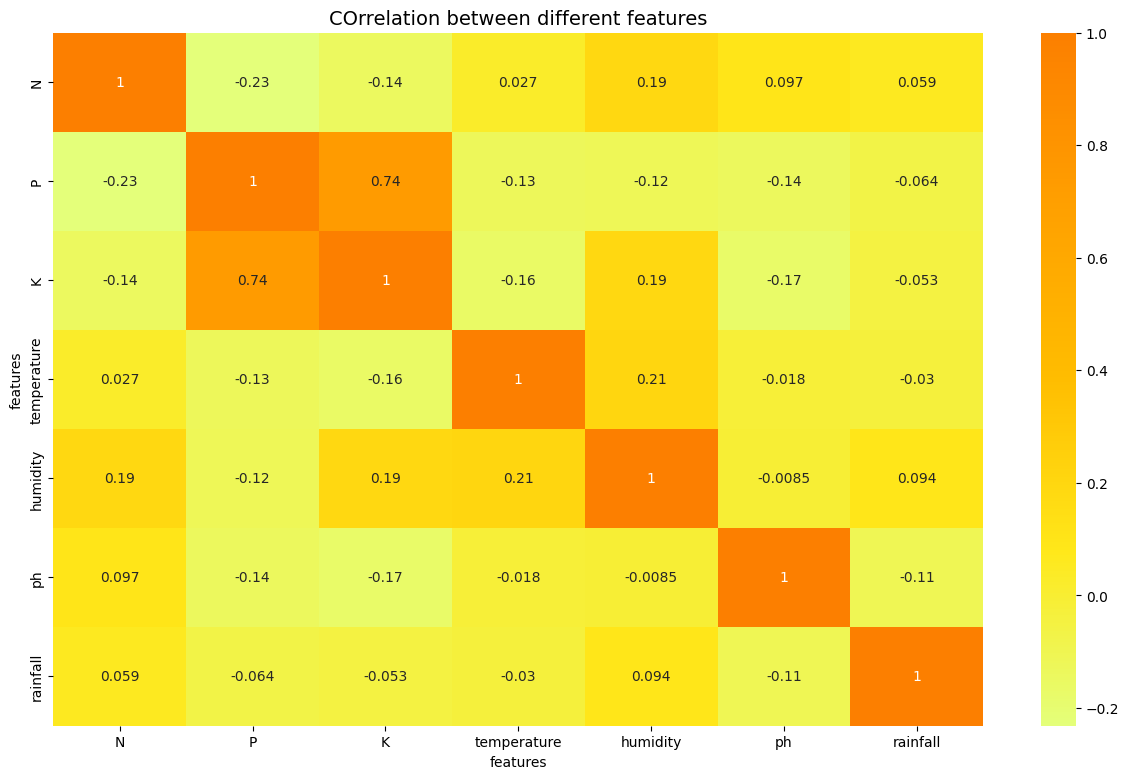

In [ ]:
# correlation between different features
fig,ax = plt.subplots(1,1,figsize=(15,9))
sns.heatmap(cropdf.corr(),annot = True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('COrrelation between different features',fontsize= 14,c='black')
plt.show()

In [ ]:
X = cropdf.drop('label',axis=1)
Y= cropdf['label']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,shuffle =True,random_state= 0)
#using Light gbm model which works on weak predictive models to build a strong predictive model
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train,Y_train)


LGBMClassifier()

In [ ]:
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(Y_pred,Y_test)
acc= accuracy_score(Y_pred,Y_test)
print(acc)

0.99


In [ ]:
Y_pred_train = model.predict(X_train)
print("Training-set accuracy score:{0:0.4f}".format(accuracy_score(Y_train,Y_pred_train)))
newdata = model.predict([[90,42,43,60,9,5.9,220]])
newdata

Training-set accuracy score:1.0000


array(['coffee'], dtype=object)